In [1]:
import pandas as pd

In [2]:
big = pd.read_csv('AITA_full_results.csv')

<ipython-input-2-689c45999f4e>:1: DtypeWarning: Columns (26,27,28,29,30,31,32,33,36,37,38,39,40,41,42,43,44,45,46,47,70,71,72,73,74,75,76,77,79,80,81,82,83,84,85,86,87,88,89,90,124,144,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248) have mixed types. Specify dtype option on import or set low_memory=False.
  big = pd.read_csv('AITA_full_results.csv')


# Binary setting

In [3]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

results = []

for col_name in big.columns:
    if 'binary' in col_name:
        tdf = big.dropna(subset=[col_name])
        tdf = tdf.loc[tdf[col_name].str.contains("YTA|NTA", na=False)]

        tdf = tdf.copy()
        tdf['pred'] = tdf[col_name].str.contains('yes|YTA', case=False, na=False).astype(int)

        # Confusion matrix components
        tp = ((tdf['is_asshole'] == 1) & (tdf['pred'] == 1)).sum()
        tn = ((tdf['is_asshole'] == 0) & (tdf['pred'] == 0)).sum()
        fp = ((tdf['is_asshole'] == 0) & (tdf['pred'] == 1)).sum()
        fn = ((tdf['is_asshole'] == 1) & (tdf['pred'] == 0)).sum()

        # Rates
        total_positives = (tdf['is_asshole'] == 1).sum()
        total_negatives = (tdf['is_asshole'] == 0).sum()
        fp_rate = fp / total_negatives if total_negatives > 0 else 0
        fn_rate = fn / total_positives if total_positives > 0 else 0
        tp_rate = tp / total_positives if total_positives > 0 else 0
        tn_rate = tn / total_negatives if total_negatives > 0 else 0

        # Metrics
        precision = precision_score(tdf['is_asshole'], tdf['pred'])
        recall = recall_score(tdf['is_asshole'], tdf['pred'])
        f1 = f1_score(tdf['is_asshole'], tdf['pred'])
        accuracy = accuracy_score(tdf['is_asshole'], tdf['pred'])

        # Append to results
        results.append({
            'column': col_name,
            'tp': tp,
            'tn': tn,
            'fp': fp,
            'fn': fn,
            'tp_rate': tp_rate,
            'tn_rate': tn_rate,
            'fpr': fp_rate,
            'fnr': fn_rate,
            'pr': precision,
            're': recall,
            'f1': f1,
            'acc': accuracy
        })

# Convert to DataFrame
results_df = pd.DataFrame(results)


In [4]:
# baseline, binary
results_df = pd.DataFrame(results)

tdf = results_df.loc[(results_df['column'].str.contains('binary'))&(results_df['column'].str.contains('base'))]
# tdf
mean_row = tdf[['pr', 're', 'f1', 'acc', 'fnr', 'fpr']].mean()
mean_row['column'] = 'average'
mean_row_df = pd.DataFrame([mean_row])
tdf = tdf.sort_values('f1', ascending=True)[['column', 'pr', 're', 'f1', 'acc', 'fnr', 'fpr']]
tdf = pd.concat([tdf, mean_row_df], ignore_index=True)




In [5]:

print(
    tdf
    .to_string(index=False, float_format='%.2f')
)

                 column   pr   re   f1  acc  fnr  fpr
   Llama-8B_binary_base 0.62 0.35 0.45 0.57 0.65 0.21
Mistral-24B_binary_base 0.77 0.44 0.56 0.65 0.56 0.13
 Mistral-7B_binary_base 0.59 0.63 0.61 0.60 0.37 0.44
     gpt-4o_binary_base 0.91 0.48 0.63 0.72 0.52 0.05
     Claude_binary_base 0.78 0.55 0.65 0.70 0.45 0.15
  Llama-17B_binary_base 0.64 0.66 0.65 0.64 0.34 0.38
  Llama-70B_binary_base 0.79 0.56 0.65 0.71 0.44 0.14
     Gemini_binary_base 0.64 0.82 0.72 0.68 0.18 0.47
                average 0.72 0.56 0.61 0.66 0.44 0.25


In [6]:
bin_col_order = tdf.column

# Open-ended results

In [7]:

import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

results = []

for col_name in big.columns:
        if 'rated' in col_name:
#             print(col_name)
            tdf = big.dropna(subset=[col_name])
            tdf = tdf[tdf[col_name].astype(str).str.len() <= 3]
            tdf = tdf[~tdf[col_name].astype(str).str.contains('im|\n\n|No|TA|A.')]

            tdf[col_name]=tdf[col_name].astype(int)

            tdf['pred'] = tdf[col_name]
            tp = ((tdf['is_asshole'] == 1) & (tdf['pred'] == 1)).sum()
            tn = ((tdf['is_asshole'] == 0) & (tdf['pred'] == 0)).sum()
            fp = ((tdf['is_asshole'] == 0) & (tdf['pred'] == 1)).sum()
            fn = ((tdf['is_asshole'] == 1) & (tdf['pred'] == 0)).sum()

            # Rates
            total_positives = (tdf['is_asshole'] == 1).sum()
            total_negatives = (tdf['is_asshole'] == 0).sum()
            fp_rate = fp / total_negatives if total_negatives > 0 else 0
            fn_rate = fn / total_positives if total_positives > 0 else 0
            tp_rate = tp / total_positives if total_positives > 0 else 0
            tn_rate = tn / total_negatives if total_negatives > 0 else 0

            # Metrics
            precision = precision_score(tdf['is_asshole'], tdf['pred'])
            recall = recall_score(tdf['is_asshole'], tdf['pred'])
            f1 = f1_score(tdf['is_asshole'], tdf['pred'])
            accuracy = accuracy_score(tdf['is_asshole'], tdf['pred'])

            # Append to results
            results.append({
                'column': col_name,
                'tp': tp,
                'tn': tn,
                'fp': fp,
                'fn': fn,
                'tp_rate': tp_rate,
                'tn_rate': tn_rate,
                'fpr': fp_rate,
                'fnr': fn_rate,
                'pr': precision,
                're': recall,
                'f1': f1,
                'acc': accuracy
            })



In [8]:
# baseline, open
results_df_open = pd.DataFrame(results)

tdf = results_df_open.loc[(results_df_open['column'].str.contains('open'))&(results_df_open['column'].str.contains('base'))]
mean_row = tdf[['pr', 're', 'f1', 'acc', 'fnr', 'fpr']].mean()
mean_row['column'] = 'average'
mean_row_df = pd.DataFrame([mean_row])
tdf = tdf.sort_values('f1', ascending=True)[['column', 'pr', 're', 'f1', 'acc', 'fnr', 'fpr']]
tdf = pd.concat([tdf, mean_row_df], ignore_index=True)



print(
    tdf
    .to_string(index=False, float_format='%.2f')
)

                         column   pr   re   f1  acc  fnr  fpr
  Llama-17B_openended_baserated 0.71 0.51 0.59 0.65 0.49 0.21
  Llama-70B_openended_baserated 0.71 0.51 0.59 0.67 0.49 0.19
     Claude_openended_baserated 0.75 0.54 0.63 0.68 0.46 0.18
 Mistral-7B_openended_baserated 0.67 0.60 0.63 0.65 0.40 0.30
   Llama-8B_openended_baserated 0.65 0.62 0.63 0.64 0.38 0.34
Mistral-24B_openended_baserated 0.67 0.66 0.67 0.67 0.34 0.33
     gpt-4o_openended_baserated 0.76 0.64 0.69 0.72 0.36 0.21
     Gemini_openended_baserated 0.67 0.74 0.70 0.69 0.26 0.37
                        average 0.70 0.60 0.64 0.67 0.40 0.26


In [9]:
# Reorder
ordered_cols = [x.split('_')[0] + '_openended_baserated' if x != 'average' else 'average' for x in bin_col_order]
tdf_filtered = tdf.set_index('column').loc[ordered_cols].reset_index()

print(
    tdf_filtered
    .to_string(index=False, float_format='%.2f')
)

                         column   pr   re   f1  acc  fnr  fpr
   Llama-8B_openended_baserated 0.65 0.62 0.63 0.64 0.38 0.34
Mistral-24B_openended_baserated 0.67 0.66 0.67 0.67 0.34 0.33
 Mistral-7B_openended_baserated 0.67 0.60 0.63 0.65 0.40 0.30
     gpt-4o_openended_baserated 0.76 0.64 0.69 0.72 0.36 0.21
     Claude_openended_baserated 0.75 0.54 0.63 0.68 0.46 0.18
  Llama-17B_openended_baserated 0.71 0.51 0.59 0.65 0.49 0.21
  Llama-70B_openended_baserated 0.71 0.51 0.59 0.67 0.49 0.19
     Gemini_openended_baserated 0.67 0.74 0.70 0.69 0.26 0.37
                        average 0.70 0.60 0.64 0.67 0.40 0.26


# Mitigations in binary setting

<ipython-input-53-67ab8ed87436>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr['column'] = rr['column'].str.replace('binary_','').str.replace('think_','')#str.replace('base_model36k','llama3').str.replace('instr_model36k','llama3I').str.replace('meta-llama/Meta-Llama-3-8B','llama3')
<ipython-input-53-67ab8ed87436>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rr['model'] = rr['column']
<ipython-input-53-67ab8ed87436>:139: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolorme

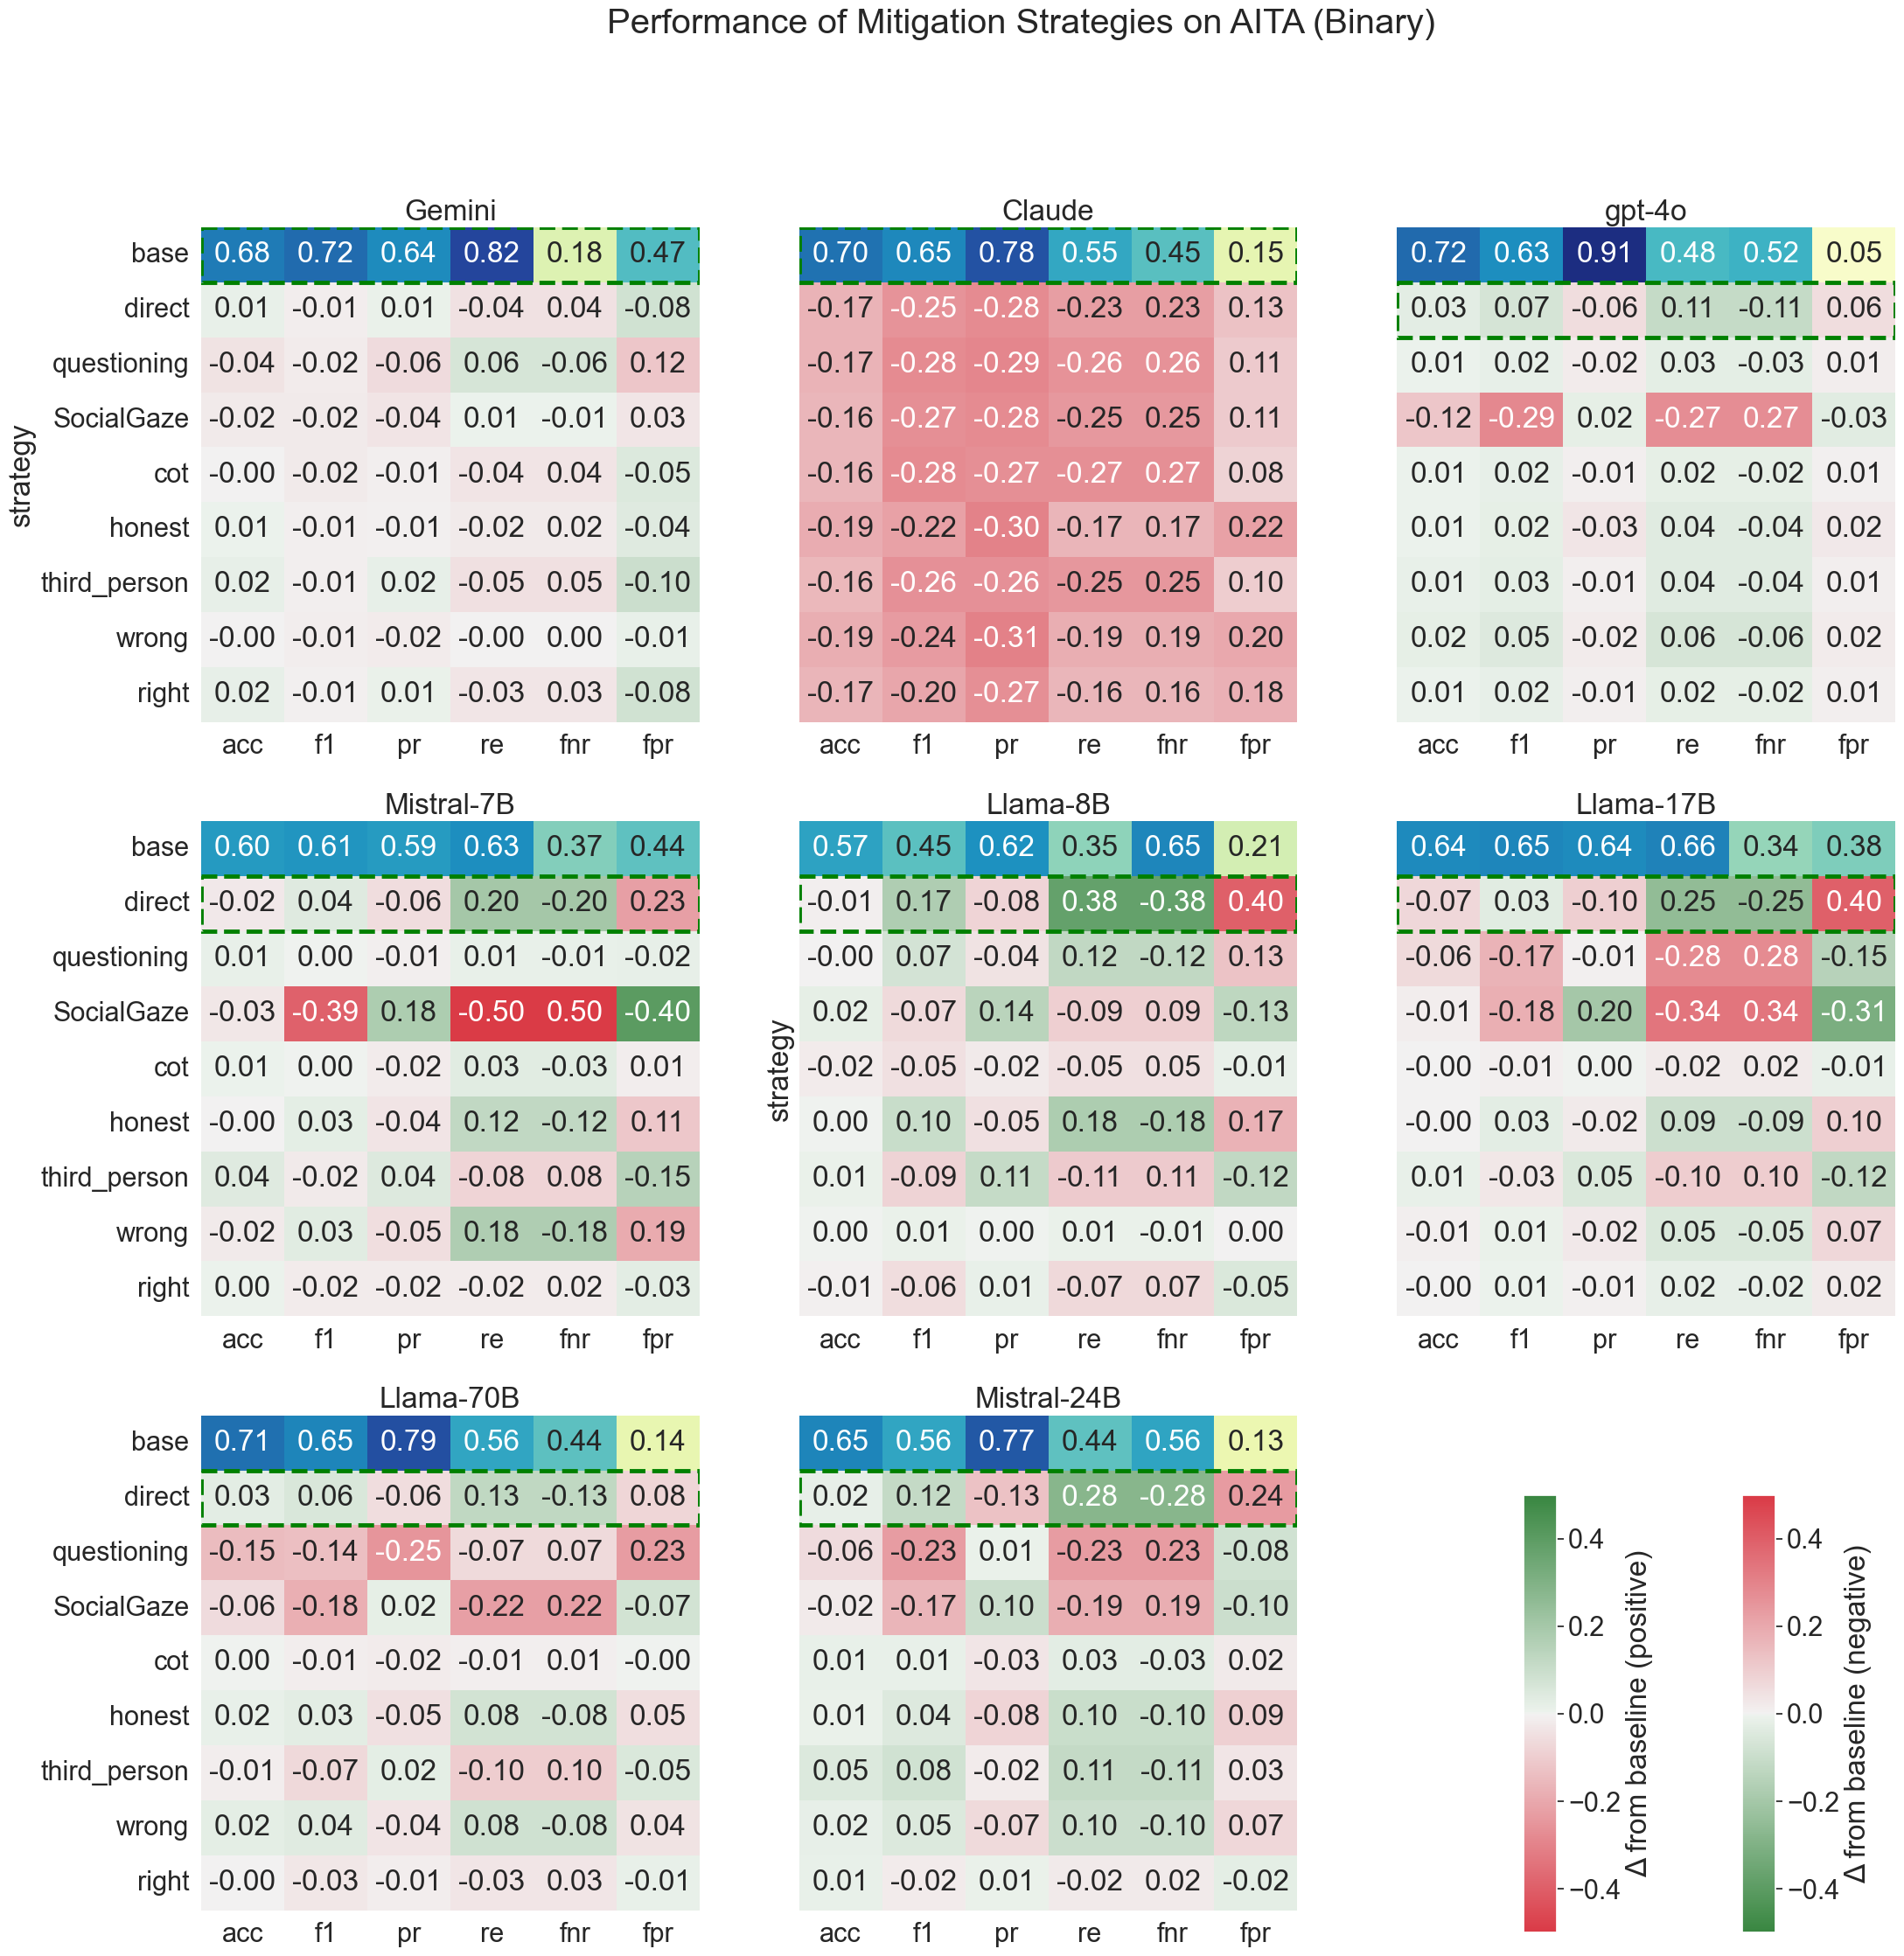

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.patches as patches
import pandas as pd
import numpy as np
desired_order = ['base', 'direct', 'questioning', 'SocialGaze',
                 'cot', 'honest', 'third_person', 'wrong', 'right']
# Setup
sns.set(font_scale=2)  # crazy big

fig, axes = plt.subplots(3, 3, figsize=(25, 25), sharey=True)
axes = axes.flatten()

models_to_plot = ['Gemini', 'Claude', 'gpt-4o', 'Mistral-7B','Llama-8B', 'Llama-17B','Llama-70B','Mistral-24B']
metrics = ['acc', 'f1','pr','re','fnr','fpr'] 
positive_metrics = ['pr','re','f1','acc']  # higher = better
negative_metrics = ['fnr', 'fpr']            # lower = better
# idx=0

rr = results_df.loc[~results_df['column'].str.contains("context")]
rr['column'] = rr['column'].str.replace('binary_','').str.replace('think_','')#str.replace('base_model36k','llama3').str.replace('instr_model36k','llama3I').str.replace('meta-llama/Meta-Llama-3-8B','llama3')

rr['model'] = rr['column']
    
for idx, model in enumerate(models_to_plot, start=0):
    # Filter & clean
    rrf = rr.loc[rr.column.str.contains(model+'_')]
    rrf = pd.concat([rrf[2:], rrf[:2]])
    rrf['column'] = (
        rrf['column']
        .str.replace(f'{model}_', '')
        .str.replace(f'_{model}', '', regex=True)
        .str.replace(f'{model}', '', regex=True).str.replace('iterative_response','SocialGaze')
    )
    rrf['model'] = rrf['column'].str.replace('_natural', '')
    rrf = rrf.loc[~rrf.column.str.contains('llama3_instr_bin')]

    # Dataframe of metric values
    metrics_df = rrf.set_index('model')[metrics].loc[desired_order]

    # Compute diffs from baseline row
    baseline = metrics_df.iloc[0]
    diffs = metrics_df.iloc[1:].subtract(baseline)

    # Full matrix: row 0 = raw values, rest = diffs
    full = pd.concat([metrics_df.iloc[:1], diffs])

    # Masks
    mask_raw = np.ones_like(full, dtype=bool)
    mask_raw[0, :] = False

    mask_diff = ~mask_raw

    # Split by metric type
    pos_cols = [metrics.index(m) for m in positive_metrics]
    neg_cols = [metrics.index(m) for m in negative_metrics]

    # Mask per group
    mask_pos = np.ones_like(full, dtype=bool)
    mask_neg = np.ones_like(full, dtype=bool)

    # Mask only diff rows, and only correct columns
    for row in range(1, full.shape[0]):
        for col in pos_cols:
            mask_pos[row, col] = False
        for col in neg_cols:
            mask_neg[row, col] = False
            
    max_f1_idx = metrics_df['f1'].idxmax()
    # Plot baseline row
    sns.heatmap(full, annot=True, fmt=".2f", cmap="YlGnBu", vmin=0, vmax=1,
                mask=mask_raw, cbar=False, ax=axes[idx])

    # Positive metrics: diverging red-green
    sns.heatmap(full, annot=True, fmt=".2f", cmap=sns.diverging_palette(10, 130, as_cmap=True),
                center=0, vmin=-0.5, vmax=0.5, mask=mask_pos,
                cbar=False, ax=axes[idx])

    
    # Negative metrics: **reversed** diverging (green = lower)
    sns.heatmap(full, annot=True, fmt=".2f", cmap=sns.diverging_palette(130, 10, as_cmap=True),
                center=0, vmin=-0.5, vmax=0.5, mask=mask_neg,
                cbar=(False), ax=axes[idx])

    # Y-axis
    axes[idx].set_yticks([x + 0.5 for x in range(len(full))])
    axes[idx].set_yticklabels(full.index)
    ax= axes[idx]
    for i, row_label in enumerate(metrics_df.index):
        if row_label != max_f1_idx:
            rect = patches.Rectangle((0, i), len(metrics_df.columns), 1, transform=axes[idx].transData,
                                     facecolor='white', alpha=0., edgecolor='none')
            axes[idx].add_patch(rect)

            
    if idx % 4 == 0:
        axes[idx].set_ylabel('strategy')
    else:
        axes[idx].set_ylabel('')

  # Overlay translucent white rectangles for reduced opacity rows
    for i, row_label in enumerate(metrics_df.index):
        if row_label != max_f1_idx:
            continue
        else:
            rect = patches.Rectangle((0, i), len(metrics_df.columns), 1, transform=axes[idx].transData,
                                      fill=False, edgecolor='green', linewidth=3.5, linestyle='--')
            axes[idx].add_patch(rect)
            
    title = model
    axes[idx].set_title(title)
    
from matplotlib.cm import ScalarMappable
from matplotlib.colors import TwoSlopeNorm

# Normalized scale for both colorbars
norm = TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.5)

# First colorbar (red = worse, green = better) — same as for positive metrics
cmap_pos = sns.diverging_palette(10, 130, as_cmap=True)
sm_pos = ScalarMappable(cmap=cmap_pos, norm=norm)
sm_pos.set_array([])

# Second colorbar (green = worse, red = better) — reversed direction, for negative metrics
cmap_neg = sns.diverging_palette(130, 10, as_cmap=True)
sm_neg = ScalarMappable(cmap=cmap_neg, norm=norm)
sm_neg.set_array([])

# Position and size of colorbars
# Position and size of colorbars, adjusting them into the 8th plot position (in the last column of the 2x4 grid)
cbar_ax1 = fig.add_axes([0.73, 0.1, 0.015, 0.2])  # top colorbar
cbar_ax2 = fig.add_axes([0.83, 0.1, 0.015, 0.2])   # bottom colorbar

# Remove empty subplots
for j in range(len(models_to_plot), len(axes)):
    fig.delaxes(axes[j])
    
fig.colorbar(sm_pos, cax=cbar_ax1, label='Δ from baseline (positive)')
fig.colorbar(sm_neg, cax=cbar_ax2, label='Δ from baseline (negative)')
plt.suptitle('Performance of Mitigation Strategies on AITA (Binary)')
plt.savefig('mitigations_binary.pdf')
plt.show()

In [32]:
# Make a new DataFrame to store highest F1 for each model
best_f1_rows = []

for model in models_to_plot:
    # Filter rows for this model
    rrf = rr.loc[rr['column'].str.contains(model + '_')]
    rrf['strategy'] = (
        rrf['column']
        .str.replace(f'{model}_', '')
        .str.replace(f'_{model}', '', regex=True)
        .str.replace(f'{model}', '', regex=True)
        .str.replace('iterative_response', 'SocialGaze')
    )
    # Find row with highest F1 score
    if not rrf.empty:
        best_row = rrf.loc[rrf['f1'].idxmax()]
        best_f1_rows.append({
            'model': model,
            'strategy': best_row['strategy'],
            
            'pr': best_row['pr'],
            're': best_row['re'],
            'f1': best_row['f1'],
            'acc': best_row['acc'],
            'fnr': best_row['fnr'],
            'fpr': best_row['fpr']
        })

# Final DataFrame with best strategies per model
best_f1_df = pd.DataFrame(best_f1_rows)

<ipython-input-32-96aa05a0c201>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rrf['strategy'] = (
<ipython-input-32-96aa05a0c201>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rrf['strategy'] = (
<ipython-input-32-96aa05a0c201>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v

In [37]:
# Compute mean of all metric columns
metric_cols = [ 'pr', 're','f1', 'acc', 'fnr', 'fpr']
average_row = best_f1_df[metric_cols].mean().to_dict()

# Add identifier fields
average_row['model'] = 'average'
average_row['strategy'] = ''

# Append to the DataFrame
best_f1_df = pd.concat([best_f1_df, pd.DataFrame([average_row])], ignore_index=True)


In [38]:

# Reorder
ordered_cols = [x.split('_')[0] for x in bin_col_order]
tdf_filtered = best_f1_df.set_index('model').loc[ordered_cols].reset_index()

print(
    tdf_filtered
    .to_string(index=False, float_format='%.2f')
)

      model strategy   pr   re   f1  acc  fnr  fpr
   Llama-8B   direct 0.54 0.72 0.62 0.56 0.28 0.61
Mistral-24B   direct 0.64 0.72 0.68 0.67 0.28 0.37
 Mistral-7B   direct 0.53 0.83 0.65 0.57 0.17 0.66
     gpt-4o   direct 0.85 0.59 0.70 0.75 0.41 0.10
     Claude     base 0.78 0.55 0.65 0.70 0.45 0.15
  Llama-17B   direct 0.54 0.92 0.68 0.57 0.08 0.77
  Llama-70B   direct 0.74 0.68 0.71 0.73 0.32 0.22
     Gemini     base 0.64 0.82 0.72 0.68 0.18 0.47
    average          0.66 0.73 0.68 0.65 0.27 0.42
    average          0.66 0.73 0.68 0.65 0.27 0.42


# Mitigations in full setting

<ipython-input-54-4240eab49432>:136: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(sm_pos, cax=cbar_ax1, label='Δ from baseline (positive)')
<ipython-input-54-4240eab49432>:137: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(sm_neg, cax=cbar_ax2, label='Δ from baseline (negative)')
posx and posy should be finite values
posx and posy should be finite values


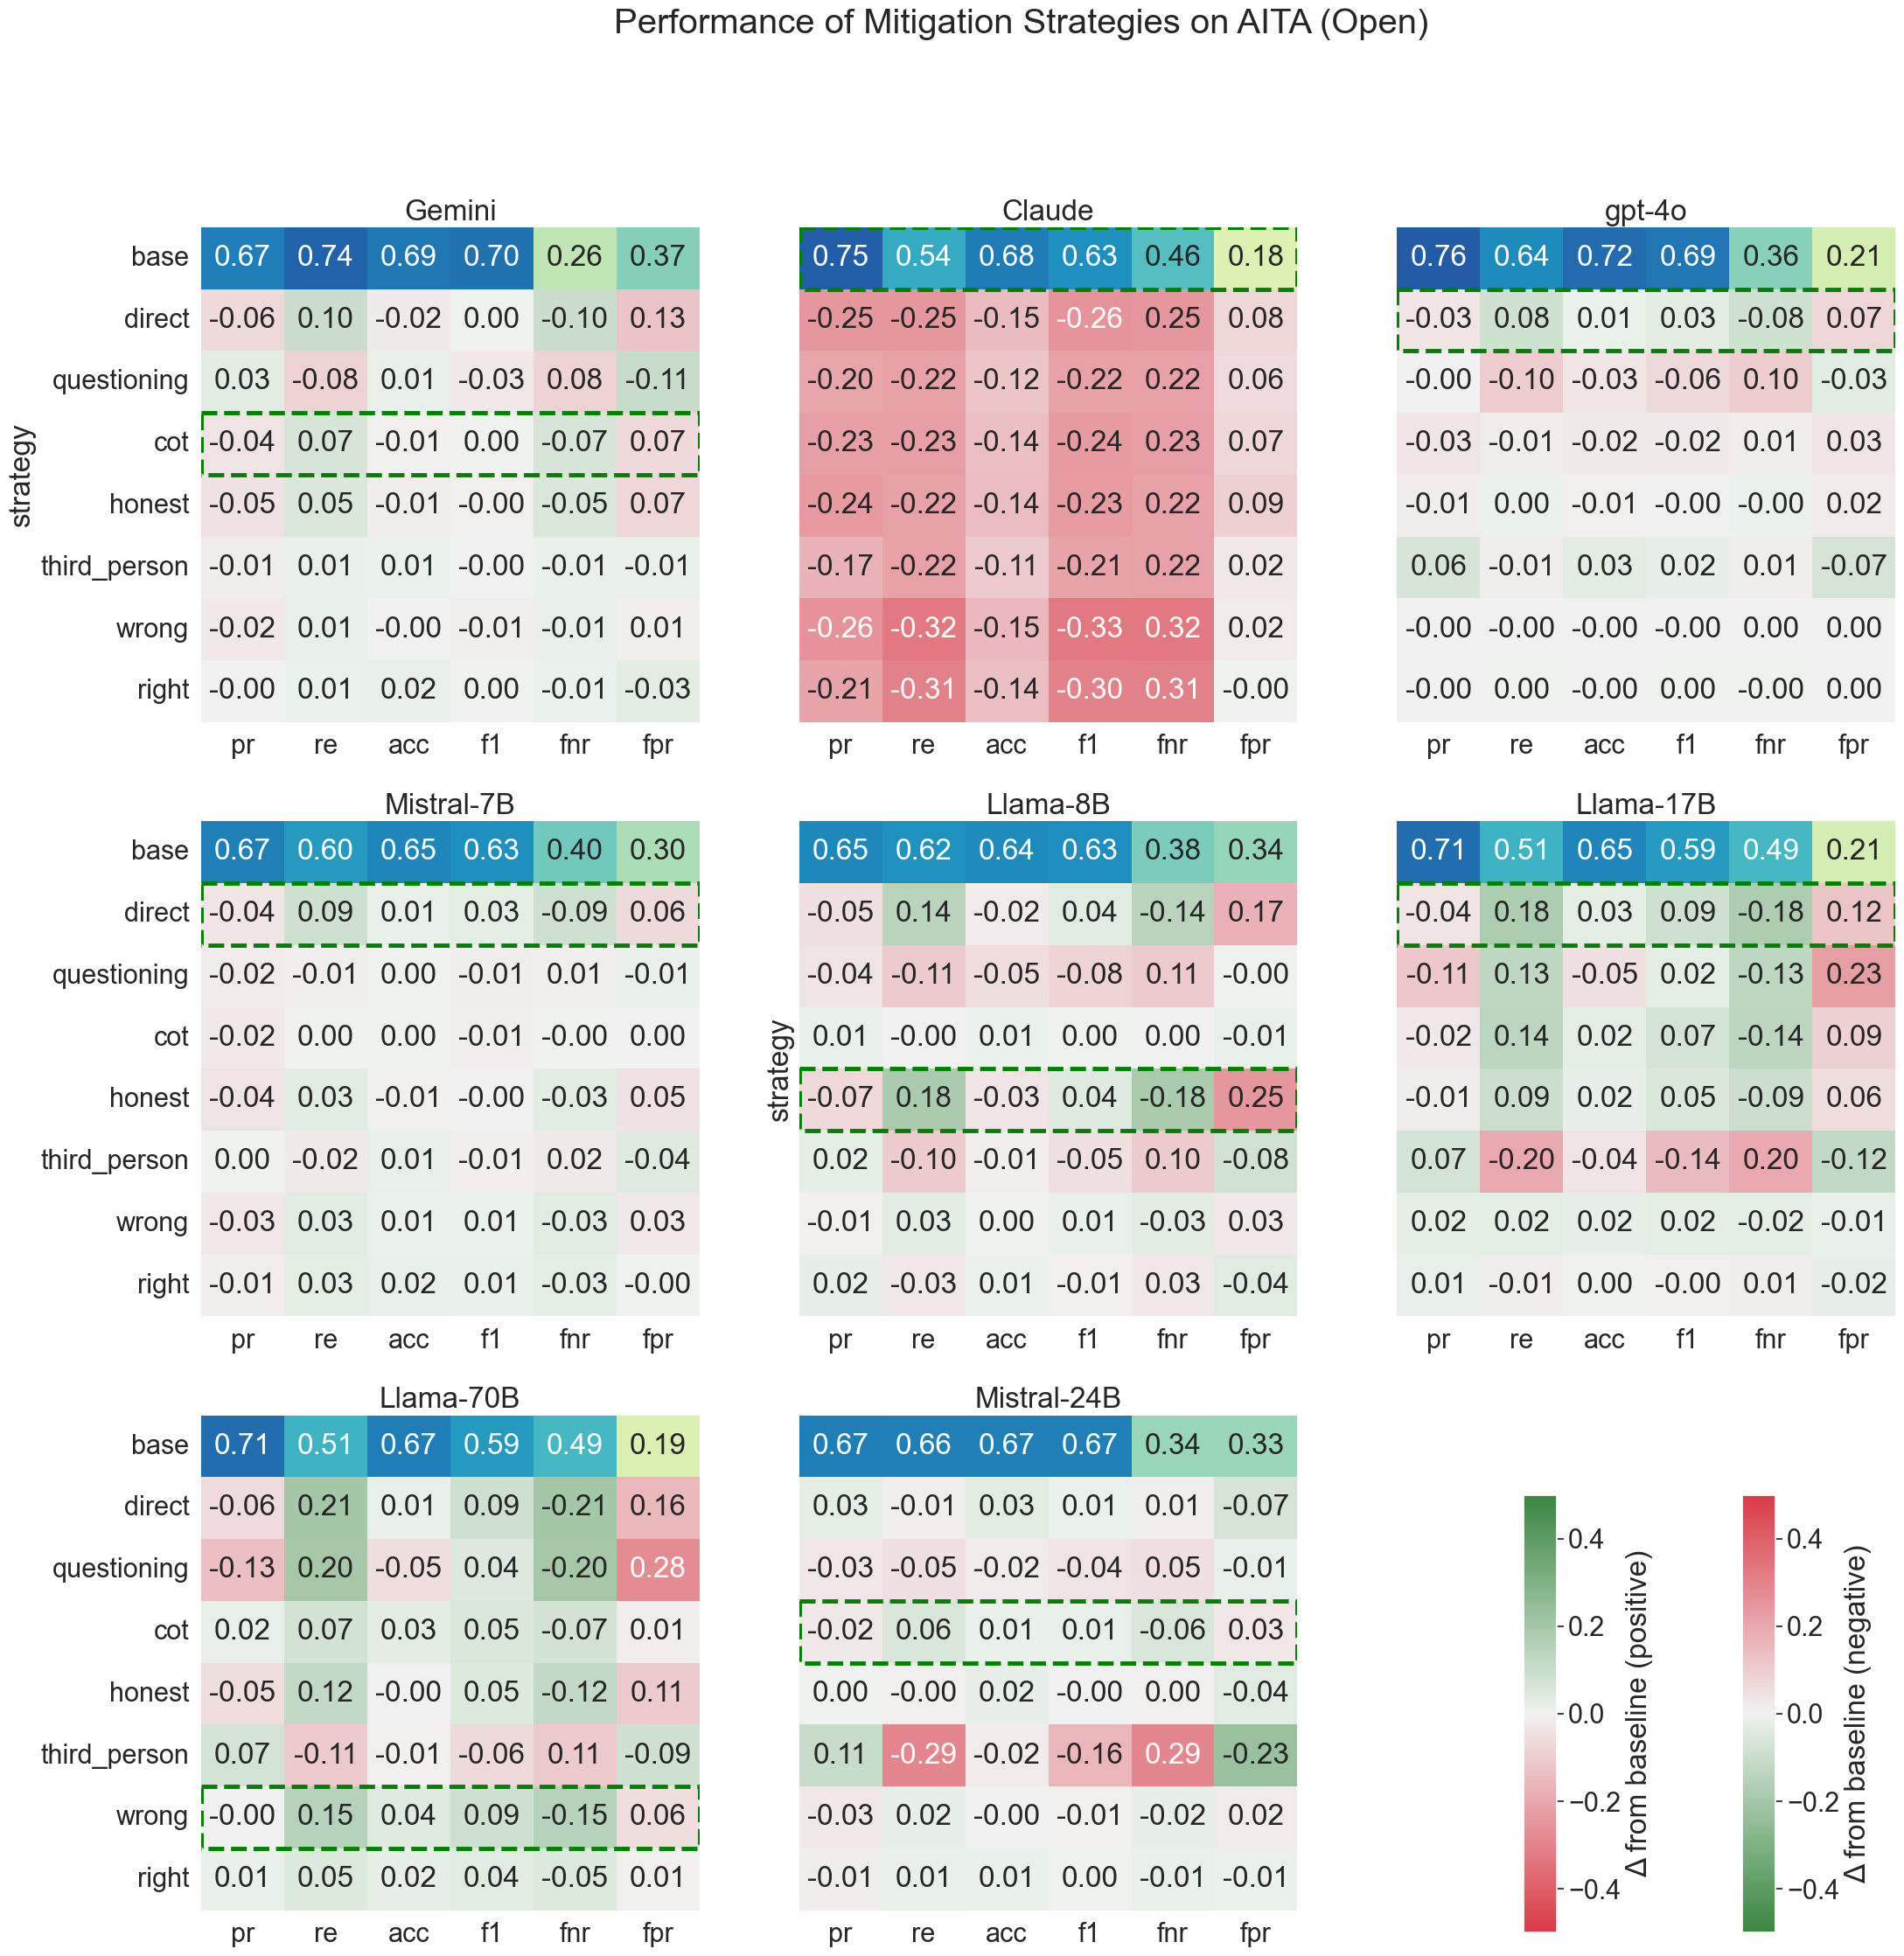

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches
import pandas as pd
import numpy as np
desired_order = ['base', 'direct', 'questioning',
#                  'SocialGaze',
                 'cot', 'honest', 'third_person', 'wrong', 'right']
# Setup
sns.set(font_scale=2)  # crazy big

fig, axes = plt.subplots(3, 3, figsize=(25, 25), sharey=True)
axes = axes.flatten()

metrics = ['pr','re','acc', 'f1',  'fnr', 'fpr']
positive_metrics = ['pr','re','f1','acc']  # higher = better
negative_metrics = ['fnr', 'fpr']            # lower = better
rr = results_df_open.loc[~results_df_open['column'].str.contains("context")]
for idx, model in enumerate(models_to_plot):
    # Filter & clean
    rrf = rr.loc[rr.column.str.contains(model)]
    rrf = pd.concat([rrf[2:], rrf[:2]])
    rrf['column'] = (
        rrf['column']
        .str.replace(f'{model}_', '')
        .str.replace(f'_{model}', '', regex=True)
        .str.replace(f'{model}', '', regex=True)
        .str.replace(f'think_', '', regex=True)
        .str.replace('openended_','').str.replace('rated','').str.replace('iterative_response','SocialGaze')
    )
    rrf['model'] = rrf['column'].str.replace('_base', '')

    # Dataframe of metric values
    metrics_df = rrf.set_index('model')[metrics].loc[desired_order]

    # Compute diffs from baseline row
    baseline = metrics_df.iloc[0]
    diffs = metrics_df.iloc[1:].subtract(baseline)

    # Full matrix: row 0 = raw values, rest = diffs
    full = pd.concat([metrics_df.iloc[:1], diffs])

    # Masks
    mask_raw = np.ones_like(full, dtype=bool)
    mask_raw[0, :] = False

    mask_diff = ~mask_raw

    # Split by metric type
    pos_cols = [metrics.index(m) for m in positive_metrics]
    neg_cols = [metrics.index(m) for m in negative_metrics]

    # Mask per group
    mask_pos = np.ones_like(full, dtype=bool)
    mask_neg = np.ones_like(full, dtype=bool)

    # Mask only diff rows, and only correct columns
    for row in range(1, full.shape[0]):
        for col in pos_cols:
            mask_pos[row, col] = False
        for col in neg_cols:
            mask_neg[row, col] = False
            
    max_f1_idx = metrics_df['f1'].idxmax()
    # Plot baseline row
    sns.heatmap(full, annot=True, fmt=".2f", cmap="YlGnBu", vmin=0, vmax=1,
                mask=mask_raw, cbar=False, ax=axes[idx])

    # Positive metrics: diverging red-green
    sns.heatmap(full, annot=True, fmt=".2f", cmap=sns.diverging_palette(10, 130, as_cmap=True),
                center=0, vmin=-0.5, vmax=0.5, mask=mask_pos,
                cbar=False, ax=axes[idx])

    
    # Negative metrics: **reversed** diverging (green = lower)
    sns.heatmap(full, annot=True, fmt=".2f", cmap=sns.diverging_palette(130, 10, as_cmap=True),
                center=0, vmin=-0.5, vmax=0.5, mask=mask_neg,
                cbar=(False), ax=axes[idx])

    # Y-axis
    axes[idx].set_yticks([x + 0.5 for x in range(len(full))])
    axes[idx].set_yticklabels(full.index)
    ax= axes[idx]
    # Overlay translucent white rectangles for reduced opacity rows
    for i, row_label in enumerate(metrics_df.index):
        if row_label != max_f1_idx:
            rect = patches.Rectangle((0, i), len(metrics_df.columns), 1, transform=axes[idx].transData,
                                     facecolor='white', alpha=0., edgecolor='none')
            axes[idx].add_patch(rect)

            
    if idx % 4 == 0:
        axes[idx].set_ylabel('strategy')
    else:
        axes[idx].set_ylabel('')

    for i, row_label in enumerate(metrics_df.index):
        if row_label != max_f1_idx:
            continue
#             rect = patches.Rectangle((0, i), len(metrics_df.columns), 1, transform=axes[idx].transData,
#                                      facecolor='white', alpha=0, edgecolor='none')
#             axes[idx].add_patch(rect)
        else:
            rect = patches.Rectangle((0, i), len(metrics_df.columns), 1, transform=axes[idx].transData,
                                      fill=False, edgecolor='green', linewidth=3.5, linestyle='--')
            axes[idx].add_patch(rect)
            
    # Title
    title = model
    axes[idx].set_title(title)
    
from matplotlib.cm import ScalarMappable
from matplotlib.colors import TwoSlopeNorm

# Normalized scale for both colorbars
norm = TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.5)

# First colorbar (red = worse, green = better) — same as for positive metrics
cmap_pos = sns.diverging_palette(10, 130, as_cmap=True)
sm_pos = ScalarMappable(cmap=cmap_pos, norm=norm)
sm_pos.set_array([])

# Second colorbar (green = worse, red = better) — reversed direction, for negative metrics
cmap_neg = sns.diverging_palette(130, 10, as_cmap=True)
sm_neg = ScalarMappable(cmap=cmap_neg, norm=norm)
sm_neg.set_array([])
# Remove empty subplots
for j in range(len(models_to_plot), len(axes)):
    fig.delaxes(axes[j])
# Position and size of colorbars
cbar_ax1 = fig.add_axes([0.73, 0.1, 0.015, 0.2])  # top bar
cbar_ax2 = fig.add_axes([0.83, 0.1, 0.015, 0.2])   # bottom bar
plt.suptitle('Performance of Mitigation Strategies on AITA (Open)')

# plt.tight_layout()
fig.colorbar(sm_pos, cax=cbar_ax1, label='Δ from baseline (positive)')
fig.colorbar(sm_neg, cax=cbar_ax2, label='Δ from baseline (negative)')
plt.savefig('mitigations_open.pdf')
plt.show()

In [55]:
# Make a new DataFrame to store highest F1 for each model
best_f1_rows = []

for model in models_to_plot:
    # Filter rows for this model
    rrf = rr.loc[(rr['column'].str.contains(model + '_')) & (rr['column'].str.contains('openended'))]
    rrf['strategy'] = (
        rrf['column']
        .str.replace(f'{model}_', '')
        .str.replace(f'_{model}', '', regex=True)
        .str.replace(f'{model}', '', regex=True)
        .str.replace('iterative_response', 'SocialGaze')
    )
    # Find row with highest F1 score
    if not rrf.empty:
        best_row = rrf.loc[rrf['f1'].idxmax()]
        best_f1_rows.append({
            'model': model,
            'strategy': best_row['strategy'].replace('openended_','').replace('rated',''),
            
            'pr': best_row['pr'],
            're': best_row['re'],
            'f1': best_row['f1'],
            'acc': best_row['acc'],
            'fnr': best_row['fnr'],
            'fpr': best_row['fpr']
        })

# Final DataFrame with best strategies per model
best_f1_df = pd.DataFrame(best_f1_rows)

# Compute mean of all metric columns
metric_cols = [ 'pr', 're','f1', 'acc', 'fnr', 'fpr']
average_row = best_f1_df[metric_cols].mean().to_dict()

# Add identifier fields
average_row['model'] = 'average'
average_row['strategy'] = ''

# Append to the DataFrame
best_f1_df = pd.concat([best_f1_df, pd.DataFrame([average_row])], ignore_index=True)

# Reorder
ordered_cols = [x.split('_')[0] for x in bin_col_order]
tdf_filtered = best_f1_df.set_index('model').loc[ordered_cols].reset_index()

print(
    tdf_filtered
    .to_string(index=False, float_format='%.2f')
)

      model    strategy   pr   re   f1  acc  fnr  fpr
   Llama-8B      honest 0.58 0.80 0.67 0.61 0.20 0.59
Mistral-24B         cot 0.64 0.72 0.68 0.68 0.28 0.36
 Mistral-7B      direct 0.63 0.68 0.66 0.66 0.32 0.36
     gpt-4o      direct 0.72 0.72 0.72 0.72 0.28 0.28
     Claude        base 0.75 0.54 0.63 0.68 0.46 0.18
  Llama-17B      direct 0.67 0.69 0.68 0.68 0.31 0.33
  Llama-70B think_wrong 0.71 0.66 0.68 0.71 0.34 0.24
     Gemini         cot 0.63 0.80 0.70 0.68 0.20 0.43
    average             0.67 0.70 0.68 0.68 0.30 0.35


<ipython-input-55-ea1b7a239ceb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rrf['strategy'] = (
<ipython-input-55-ea1b7a239ceb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rrf['strategy'] = (
<ipython-input-55-ea1b7a239ceb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-v